<a href="https://colab.research.google.com/github/tfrbf/Deep/blob/main/diabets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [85]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder
import matplotlib.pyplot as plt
import keras


Load the data


In [86]:
data = pd.read_csv('/content/diabetes.csv')  # Replace with your actual file path

In [87]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [88]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [89]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Select the relevant columns

In [90]:
features = ['Age', 'Pregnancies', 'BMI', 'Glucose'] #30, 2,27,100
target = 'Outcome'

Split the data into features and target

In [91]:
X = data[features]
Y = data[target]
num_classes = len(np.unique(Y))
y = keras.utils.to_categorical(Y,num_classes) #?

1
[0. 1.]


Split the data into training and testing sets

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

 Normalize the features

Attention!!!
Standardization means that we change each feature of the data so that its mean is zero and its standard deviation is one. This is done by subtracting the average and dividing by the standard deviation of each feature.

Normalization, however, usually means changing the range of data to [0, 1] or [-1, 1] and is mostly done using methods such as Min-Max scaling.

**Therefore, we are obviously doing standardization here, but this step is usually called data normalization**

In [93]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
x_t = np.array([[20,0,21,40]])
x_t_n = scaler.transform(x_t)
x_t_n

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.1229418 , -1.13052335, -1.42008463, -2.52601308]])

In [95]:
X_train_scaled.shape[1]

4

Build the neural network model

In [145]:
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(X_train_scaled.shape[1],)),

    Dense(2,activation='softmax')  # Linear activation for regression
])

# Compile the model

In [146]:
model.compile(optimizer='adam', loss='categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 450 (1.76 KB)

 Trainable params: 450 (1.76 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [147]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3364 - loss: 1.3288 - val_accuracy: 0.3902 - val_loss: 0.8920
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3403 - loss: 0.8528 - val_accuracy: 0.7154 - val_loss: 0.6632
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6896 - loss: 0.6401 - val_accuracy: 0.6179 - val_loss: 0.6165
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6622 - loss: 0.5961 - val_accuracy: 0.6098 - val_loss: 0.6046
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6889 - loss: 0.5695 - val_accuracy: 0.6423 - val_loss: 0.5913
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6899 - loss: 0.5653 - val_accuracy: 0.6667 - val_loss: 0.5740
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7057 - loss: 0.5495 - val_accuracy: 0.6748 - val_loss: 0.5619
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7090 - loss: 0.5332 - val_accuracy: 0.7154 - 

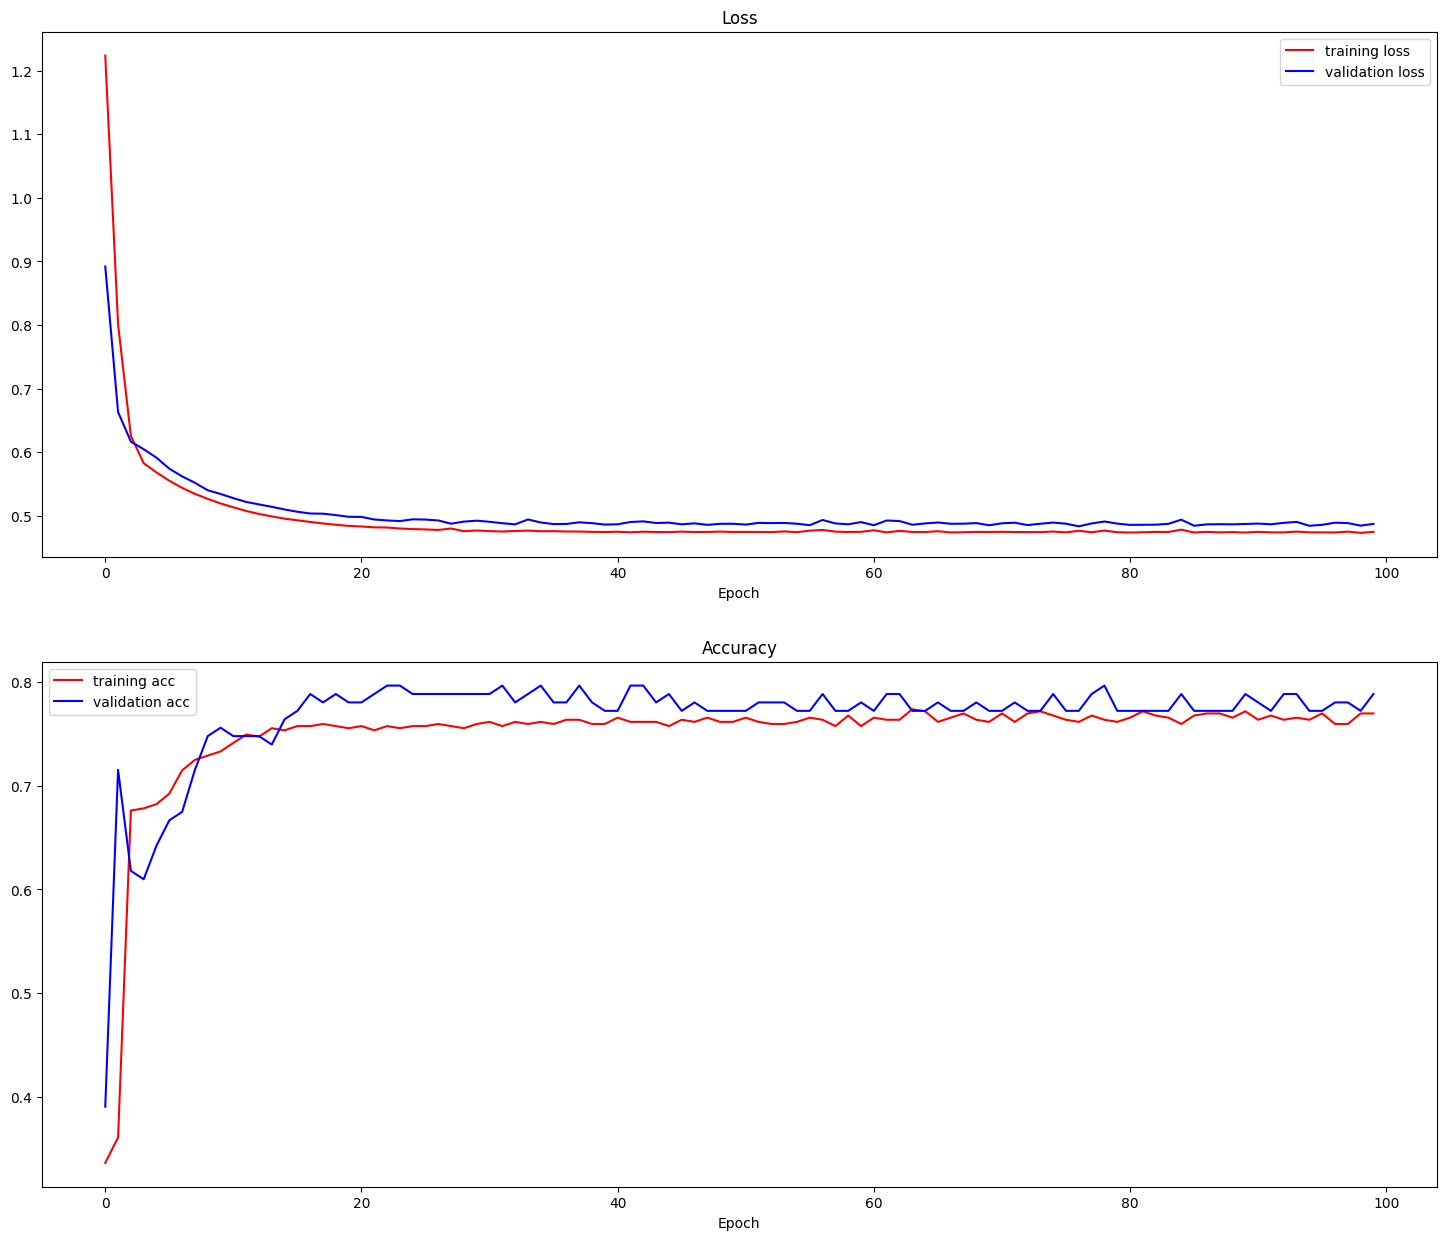

In [148]:
plt.figure(figsize=(18,15))
plt.subplot(2,1,1)
plt.plot(history.epoch, history.history['loss'],c = 'r',label = 'training loss')
plt.plot(history.epoch, history.history['val_loss'],c = 'b', label = 'validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(2,1,2)
plt.plot(history.epoch, history.history['accuracy'],c = 'r',label = 'training acc')
plt.plot(history.epoch, history.history['val_accuracy'],c = 'b', label = 'validation acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Evaluate the model

In [149]:
score = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7316 - loss: 0.5310 
Test Loss: 0.5251024961471558
Test accuracy: 0.7532467246055603


In [150]:
model.predict(x_t_n)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[0.99132854, 0.00867152]], dtype=float32)